# Analyse av lesing fra koreader

Gjort ved hjelp av python og pandas

In [58]:
import pandas as pd
import numpy as np

In [115]:
books = pd.read_csv("books.csv")
books["total_read_time"] = pd.to_timedelta(books["total_read_time"], unit="s")
books["total_read_hours"] = books["total_read_time"].dt.total_seconds() / (60*60)
books["seconds_per_page"] = books["total_read_time"].dt.total_seconds() / books["total_read_pages"]

books

,id,title,authors,notes,last_open,highlights,pages,series,language,md5,total_read_time,total_read_pages,total_read_hours,seconds_per_page
0,1,Data Structures,en.wikibooks.org,0,1710452320,0,353,NaN,en-US,04c6355c9caec0c499e7fd3498d5cced,0 days 01:57:33,96,1.959167,73.468750
1,2,3Blue1Brown Calculus,Grant Sanderson & Kurt Bruns,0,1708897008,0,405,NaN,en-US,58d9ce61e2be6a4afdb66885d0e8be4b,0 days 11:51:24,405,11.856667,105.392593
2,3,Learn You a Haskell for Great Good!,Miran Lipovača,0,1733392004,0,676,NaN,en-US,12cae255ae921fe559d3ae20486f45ad,0 days 05:44:58,213,5.749444,97.173709
3,4,Crafting Interpreters,Robert Nystrom,0,1710367474,0,1507,NaN,en-US,f99764794058c0b86d8bac5e4b0cf929,0 days 02:25:55,103,2.431944,85.000000
4,5,Learn You Some Erlang for Great Good!,Frederic Trottier-Hebert,0,1717278438,0,1564,NaN,en-US,8da76584c022d290f929d4bf089fa45b,0 days 00:41:41,43,0.694722,58.162791
5,6,The Hitchhiker's Guide to the Galaxy,Douglas Adams,126,1734472571,28,411,NaN,en-US,f3ada9089841b55a5749663ba5119179,0 days 06:28:53,272,6.481389,85.783088
6,7,Harry Potter à l'Ecole des Sorciers,J. K. Rowling,0,1739028361,6,443,Harry Potter [FR] #1,fr,01ca3f028b4d1f6120d78c23dabccd5e,0 days 02:51:02,38,2.850556,270.052632
7,8,Leviathan Wakes,James S. A. Corey,0,1736028911,0,771,The Expanse #1,en-US,de8144ccb4af7e8afb43be81ea44363f,0 days 00:40:02,23,0.667222,104.434783
8,9,Because Internet: Understanding the New Rules ...,Gretchen McCulloch,0,1737582762,0,518,NaN,en-US,0e9eceee40fb36a486d1e8bc83f2e16f,0 days 02:45:11,92,2.753056,107.728261


In [78]:
pages = pd.read_csv("pages.csv")
pages["date"] = (
    pd.to_datetime(pages["start_time"], unit="s")
    .dt.tz_localize("UTC")
    .dt.tz_convert("Europe/Oslo")
)
pages["hour"] = pages["date"].dt.hour
# pages["duration"] = pd.to_timedelta(pages["duration"]) # Easier to handle as int
pages["weekday"] = pages["date"].dt.weekday
pages = pages.merge(books, left_on='id_book', right_on='id', how='left')

pages

,id_book,page,start_time,duration,total_pages,date,hour,weekday,id,title,...,notes,last_open,highlights,pages,series,language,md5,total_read_time,total_read_pages,seconds_per_page
0,1,2,1704186636,21,337,2024-01-02 10:10:36+01:00,10,1,1,Data Structures,...,0,1710452320,0,353,NaN,en-US,04c6355c9caec0c499e7fd3498d5cced,0 days 01:57:33,96,73.468750
1,1,7,1704186665,80,337,2024-01-02 10:11:05+01:00,10,1,1,Data Structures,...,0,1710452320,0,353,NaN,en-US,04c6355c9caec0c499e7fd3498d5cced,0 days 01:57:33,96,73.468750
2,1,24,1704186747,120,306,2024-01-02 10:12:27+01:00,10,1,1,Data Structures,...,0,1710452320,0,353,NaN,en-US,04c6355c9caec0c499e7fd3498d5cced,0 days 01:57:33,96,73.468750
3,1,22,1704186905,6,281,2024-01-02 10:15:05+01:00,10,1,1,Data Structures,...,0,1710452320,0,353,NaN,en-US,04c6355c9caec0c499e7fd3498d5cced,0 days 01:57:33,96,73.468750
4,1,22,1704186920,120,290,2024-01-02 10:15:20+01:00,10,1,1,Data Structures,...,0,1710452320,0,353,NaN,en-US,04c6355c9caec0c499e7fd3498d5cced,0 days 01:57:33,96,73.468750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,7,41,1739025843,41,443,2025-02-08 15:44:03+01:00,15,5,7,Harry Potter à l'Ecole des Sorciers,...,0,1739028361,6,443,Harry Potter [FR] #1,fr,01ca3f028b4d1f6120d78c23dabccd5e,0 days 02:51:02,38,270.052632
2116,7,40,1739025622,120,443,2025-02-08 15:40:22+01:00,15,5,7,Harry Potter à l'Ecole des Sorciers,...,0,1739028361,6,443,Harry Potter [FR] #1,fr,01ca3f028b4d1f6120d78c23dabccd5e,0 days 02:51:02,38,270.052632
2117,7,39,1739025311,120,443,2025-02-08 15:35:11+01:00,15,5,7,Harry Potter à l'Ecole des Sorciers,...,0,1739028361,6,443,Harry Potter [FR] #1,fr,01ca3f028b4d1f6120d78c23dabccd5e,0 days 02:51:02,38,270.052632
2118,7,41,1739028278,11,443,2025-02-08 16:24:38+01:00,16,5,7,Harry Potter à l'Ecole des Sorciers,...,0,1739028361,6,443,Harry Potter [FR] #1,fr,01ca3f028b4d1f6120d78c23dabccd5e,0 days 02:51:02,38,270.052632


## Sekunder per side

Jeg finner ut hvor lang tid jeg bruker per side i gjennomsnitt

In [122]:
pages["seconds_per_page"].mean()

np.float64(105.29754611799375)

## Sider lest hver dag

Finner ut hvor mange sider jeg leser i gjennomsnitt hver dag.

In [131]:
pages.groupby(pd.Grouper(key="date", freq="D")).size().mean()

np.float64(5.247524752475248)

## Tid per side

Jeg ser at jeg bruker mye mer tid på å lese denne franske boken, og generelt leser jeg litt raskere når jeg leser skjønnlitteratur

Text(0, 0.5, '')

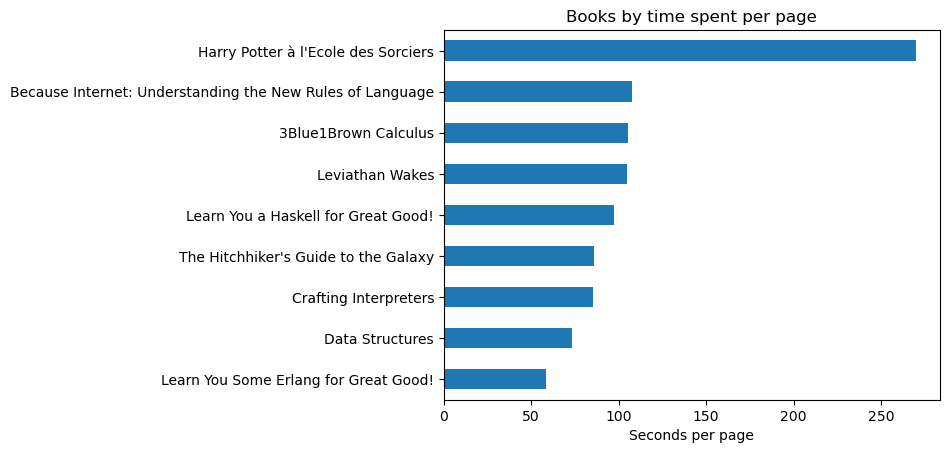

In [34]:
ax = books.sort_values("seconds_per_page").plot(kind="barh", x="title", y="seconds_per_page", legend=False)
ax.set_title("Books by time spent per page")
ax.set_xlabel("Seconds per page")
ax.set_ylabel("")

## Total tid per bok

Jeg ser at de bøkene jeg har lest mest er en bok om matte fra 3b1b, og The Hitchhiker's Guide to the Galaxy.

Text(0, 0.5, '')

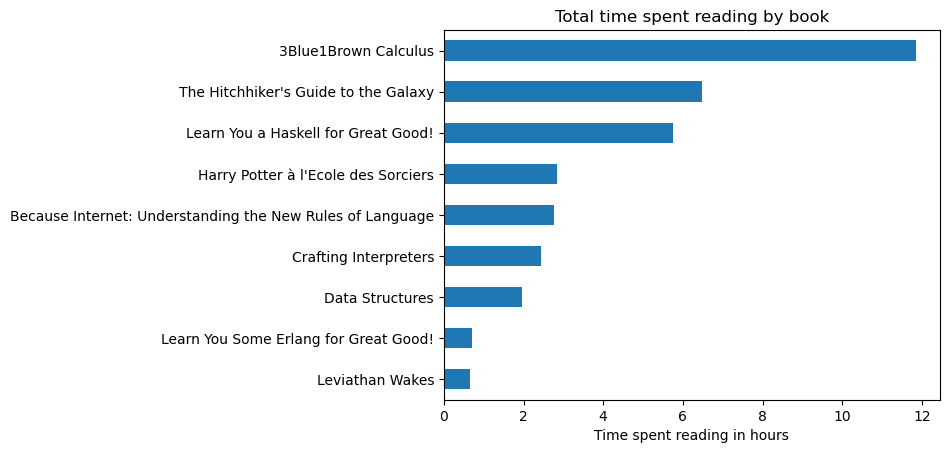

In [135]:
ax = books.sort_values("total_read_hours").plot(kind="barh", x="title", y="total_read_hours", legend=False)
ax.set_title("Total time spent reading by book")
ax.set_xlabel("Time spent reading in hours")
ax.set_ylabel("")

## Tid per side etter språk

Her viser jeg videre at jeg leser mye raskere når jeg leser på engelsk enn når jeg leser på fransk, som jeg også så fra den ene franske boken tidligere.

Text(0.5, 0, 'Seconds per page')

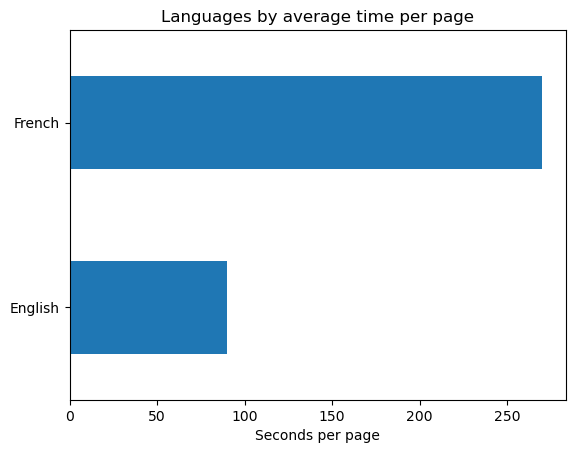

In [45]:
ax = books.replace({
    "language": {
        "en-US": "English",
        "fr": "French",
    },
}).groupby("language")["seconds_per_page"].mean().plot(kind="barh")
ax.set_title("Languages by average time per page")
ax.set_ylabel("")
ax.set_xlabel("Seconds per page")

## Tid per side i en bok

Jeg ser dypere på en spesifikk bok på hvor lang tid jeg bruker for hver side. Jeg ser at tiden varierer veldig mye, men når jeg plotter et rullende gjennomsnitt og en trendlinje ser jeg at hastigheten ligger noenlunde rundt det samme området hele tiden.

Det er et lite hull med manglende data mellom omtrent side 130 og 170. Dette samsvarer med en periode der jeg holdt på å bytte fra en e-reader til en annen, og leste den fysiske boken i mellomtiden. Derfor er det ikke logget noen data i denne tidsperioden.

Text(0, 0.5, 'Time in seconds')

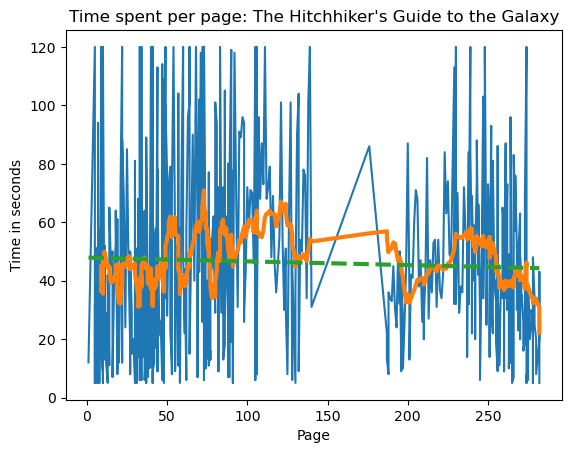

In [134]:
book = pages.groupby("title").get_group("The Hitchhiker's Guide to the Galaxy").sort_values("page")
ax = book.plot(x="page", y="duration", legend=False)

book["rolling_avg"] = book["duration"].rolling(window=20).mean()
book.plot(ax=ax, x="page", y="rolling_avg", linewidth=3, legend=False)

trend_line = np.polyval(np.polyfit(book["page"], book["duration"], 1), book["page"])
ax.plot(book["page"], trend_line, linewidth=3, linestyle="--")

ax.set_title("Time spent per page: The Hitchhiker's Guide to the Galaxy")
ax.set_xlabel("Page")
ax.set_ylabel("Time in seconds")

## Sider lest etter ukedag

Jeg leser omtrent like mye hver dag, men litt mer rundt midten av uken. Dette antar jeg er tilfeldig.

Text(0, 0.5, 'Total pages')

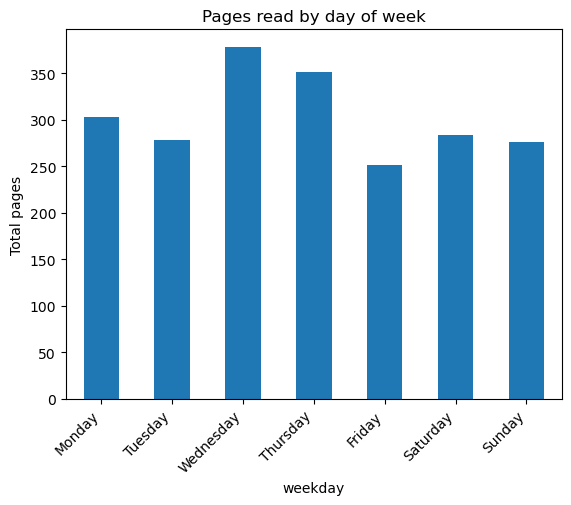

In [96]:
ax = pages["weekday"].value_counts().sort_index().plot(kind="bar")
ax.set_title("Pages read by day of week")
ax.set_xticklabels(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    rotation=45,
    ha="right",
)
ax.set_ylabel("Total pages")

## Sider lest over tid

Jeg leste ganske mye i starten av 2024, og gikk en ganske lang tidsperiode uten å lese veldig mye, før slutten av 2024 frem til nå.

Text(0, 0.5, 'Total pages')

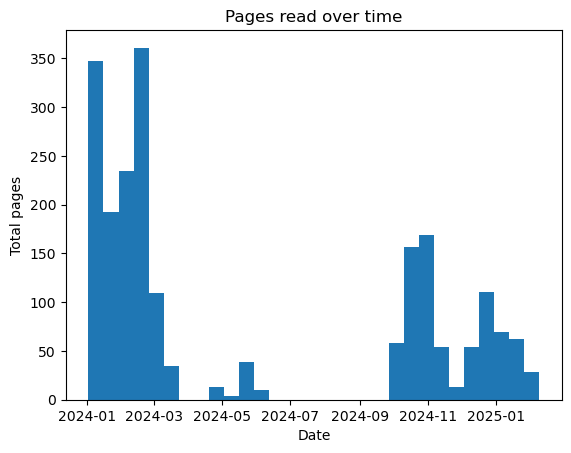

In [102]:
ax = pages["date"].hist(bins=30, grid=False)
ax.set_title("Pages read over time")
ax.set_xlabel("Date")
ax.set_ylabel("Total pages")

## Sider lest etter tid på dagen

Her seg jeg at mesteparten av sidene jeg har lest er fra 22-23. Dette er fordi tiden jeg oftest leser er om kvelden, før jeg legger meg. Det er i tillegg litt høyere rundt klokken 7 og 8, som er den tiden jeg er på vei til skolen.

Text(0, 0.5, 'Total pages')

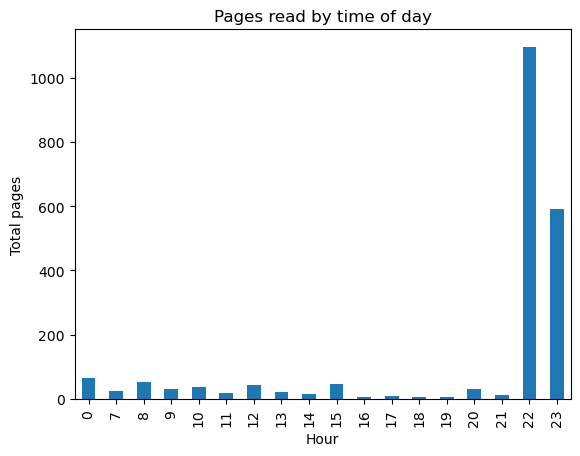

In [106]:
ax = pages["hour"].value_counts().sort_index().plot(kind="bar")
ax.set_title("Pages read by time of day")
ax.set_xlabel("Hour")
ax.set_ylabel("Total pages")

## Tid per side etter tid på dagen

Jeg leser noe tregere om kvelden, selv om dette også er den tiden jeg leser flest sider. Midt på dagen bruker jeg minst tid per side, som kan vise at jeg er mer våken og dermed leser raskere rundt midten av dagen, spesielt rundt klokken 14.

Text(0, 0.5, 'Seconds per page')

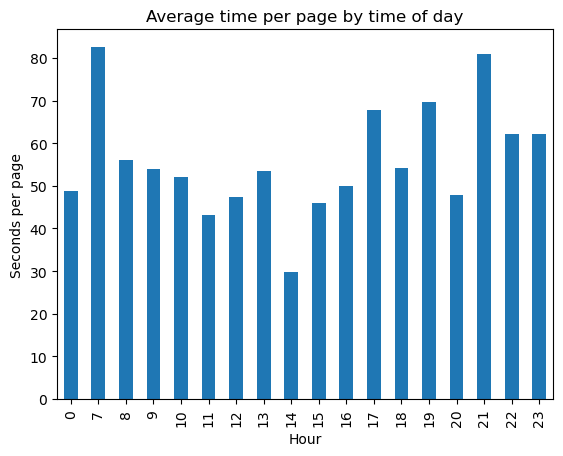

In [108]:
ax = pages.groupby("hour")["duration"].mean().plot(kind="bar")
ax.set_title("Average time per page by time of day")
ax.set_xlabel("Hour")
ax.set_ylabel("Seconds per page")